In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
data = pd.read_csv(r'C:\Users\manas\Documents\FastestCoderFirstRepo\Cities\singapore.csv')
data.head()

,date,time,tempC,windspeed,rainfall,humidity,pressure,cloudcover
0,2023-01-01,0,25,14,0.0,81,1013,58
1,2023-01-01,3,25,16,0.0,84,1012,69
2,2023-01-01,6,25,16,0.0,85,1011,56
3,2023-01-01,9,26,17,0.0,79,1013,57
4,2023-01-01,12,29,14,0.0,64,1012,22


In [3]:
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'].astype(str).str.zfill(2) + ':00')

data.set_index('datetime', inplace=True)

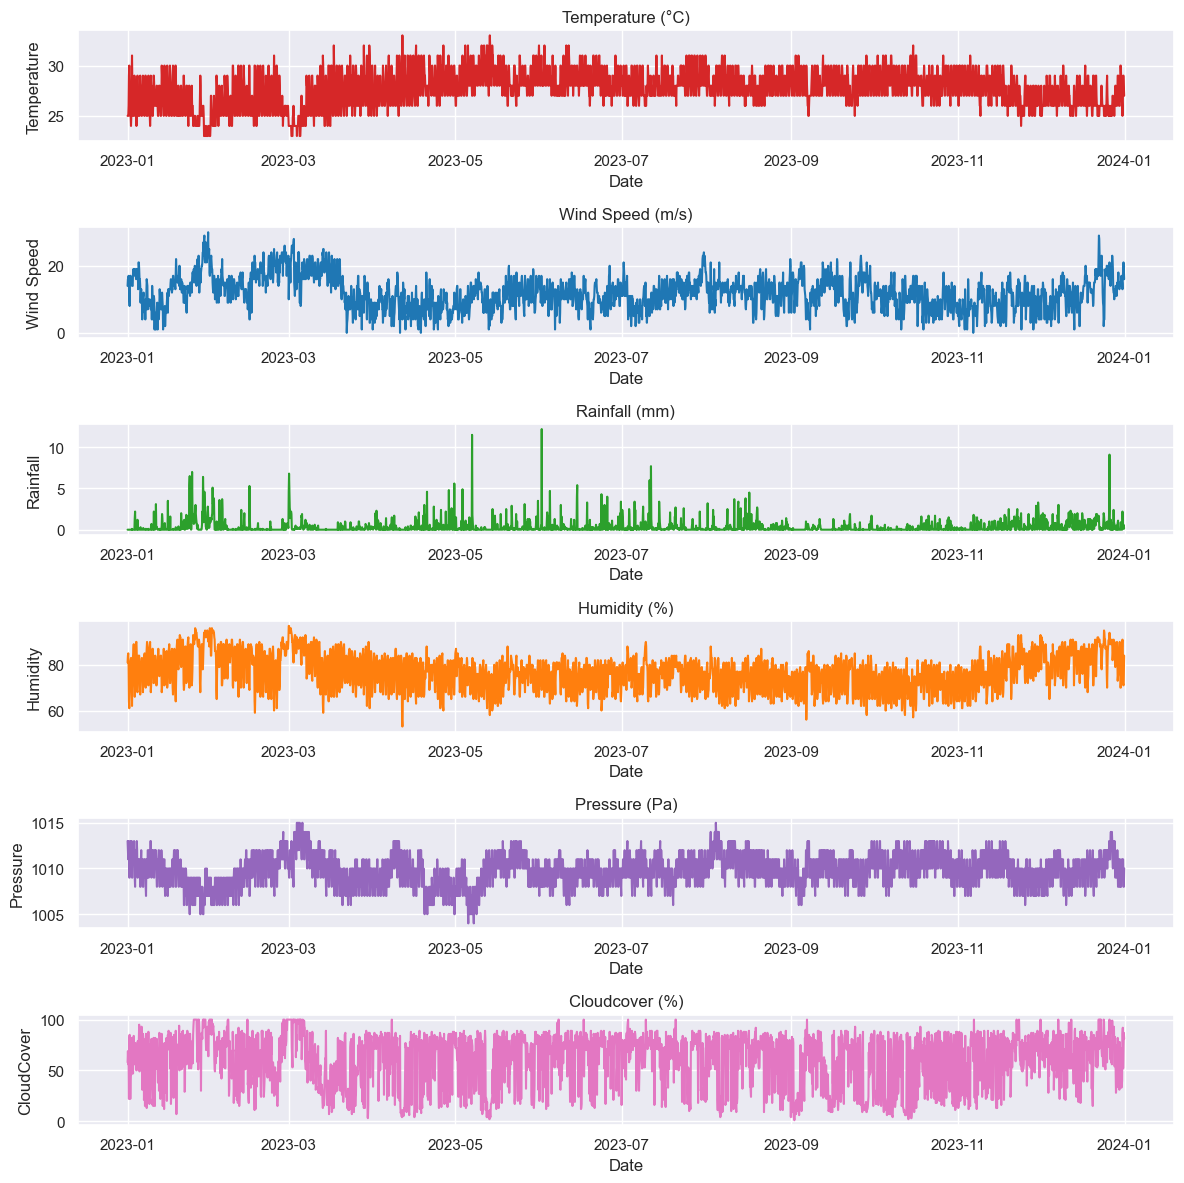

In [4]:
plt.figure(figsize=(12, 12))

# Plot temperature
plt.subplot(6, 1, 1)
plt.plot(data.index, data['tempC'], color='tab:red')
plt.title('Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Plot windspeed
plt.subplot(6, 1, 2)
plt.plot(data.index, data['windspeed'], color='tab:blue')
plt.title('Wind Speed (m/s)')
plt.xlabel('Date')
plt.ylabel('Wind Speed')

# Plot rainfall
plt.subplot(6, 1, 3)
plt.plot(data.index, data['rainfall'], color='tab:green')
plt.title('Rainfall (mm)')
plt.xlabel('Date')
plt.ylabel('Rainfall')

#Plot Humidity
plt.subplot(6, 1, 4)
plt.plot(data.index, data['humidity'], color='tab:orange')
plt.title('Humidity (%)')
plt.xlabel('Date')
plt.ylabel('Humidity')

#Plot Pressure
plt.subplot(6, 1, 5)
plt.plot(data.index, data['pressure'], color='tab:purple')
plt.title('Pressure (Pa)')
plt.xlabel('Date')
plt.ylabel('Pressure')

#Plot Cloudcover
plt.subplot(6, 1, 6)
plt.plot(data.index, data['cloudcover'], color='tab:pink')
plt.title('Cloudcover (%)')
plt.xlabel('Date')
plt.ylabel('CloudCover')

plt.tight_layout()
plt.show()

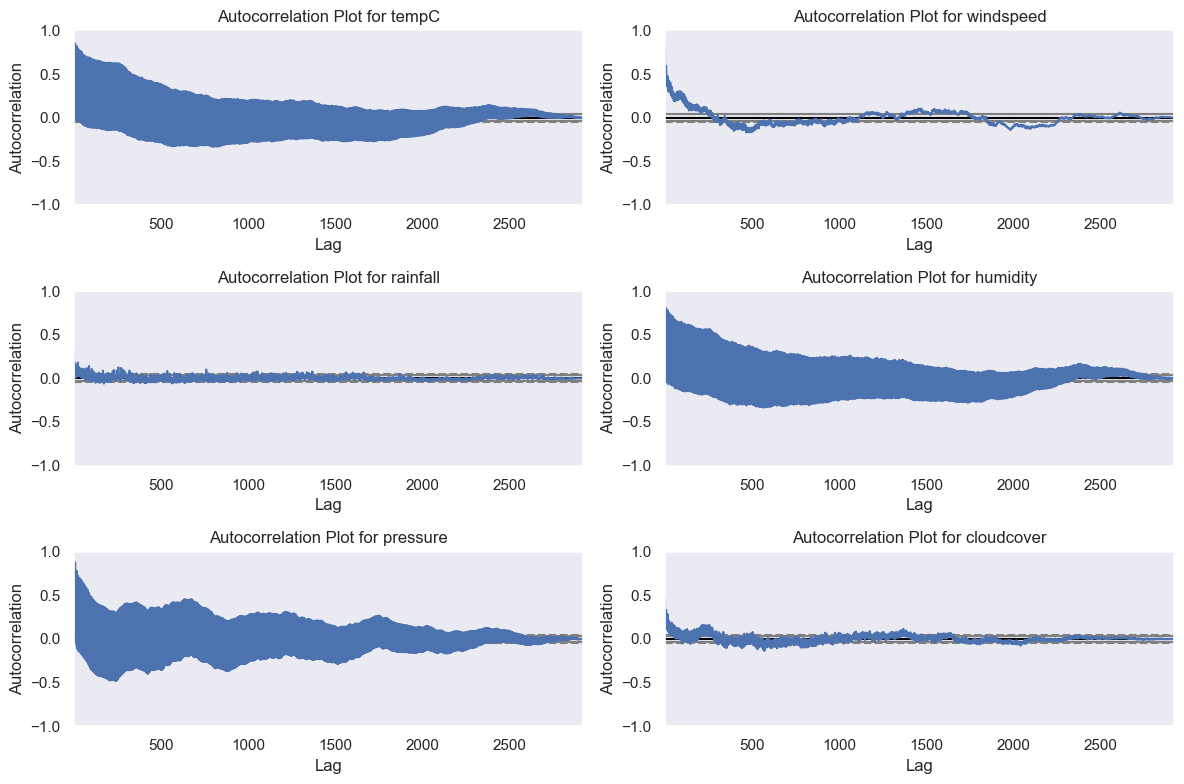

In [5]:
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'].astype(str).str.zfill(2) + ':00')
data.set_index('datetime', inplace=True)

plt.figure(figsize=(12, 8))

variables = ['tempC', 'windspeed', 'rainfall', 'humidity', 'pressure', 'cloudcover']

for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 2, i)
    pd.plotting.autocorrelation_plot(data[variable])
    plt.title(f'Autocorrelation Plot for {variable}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

#### Decay Rate :
A steep decay rate states that only the recent values of a parameter as useful to predict the new predictions.
Eg : Temperature correlation at the starting of the time series
A gradual decay states that the correlation value remains somewhat similar throughout the time series.
Eg : Cloudcover correlation throughout the time series.

#### Cyclic Pattern :
Cyclic pattern, suggests a regular and repeating pattern of changes which depicts seasonality in values, i.e Pressure Correlation is cyclic and shows a trend/seasonality based on time.

#### Randomness : 
If correlation is very low, the change is random and does not follow a predictable pattern; example CloudCover

tempC


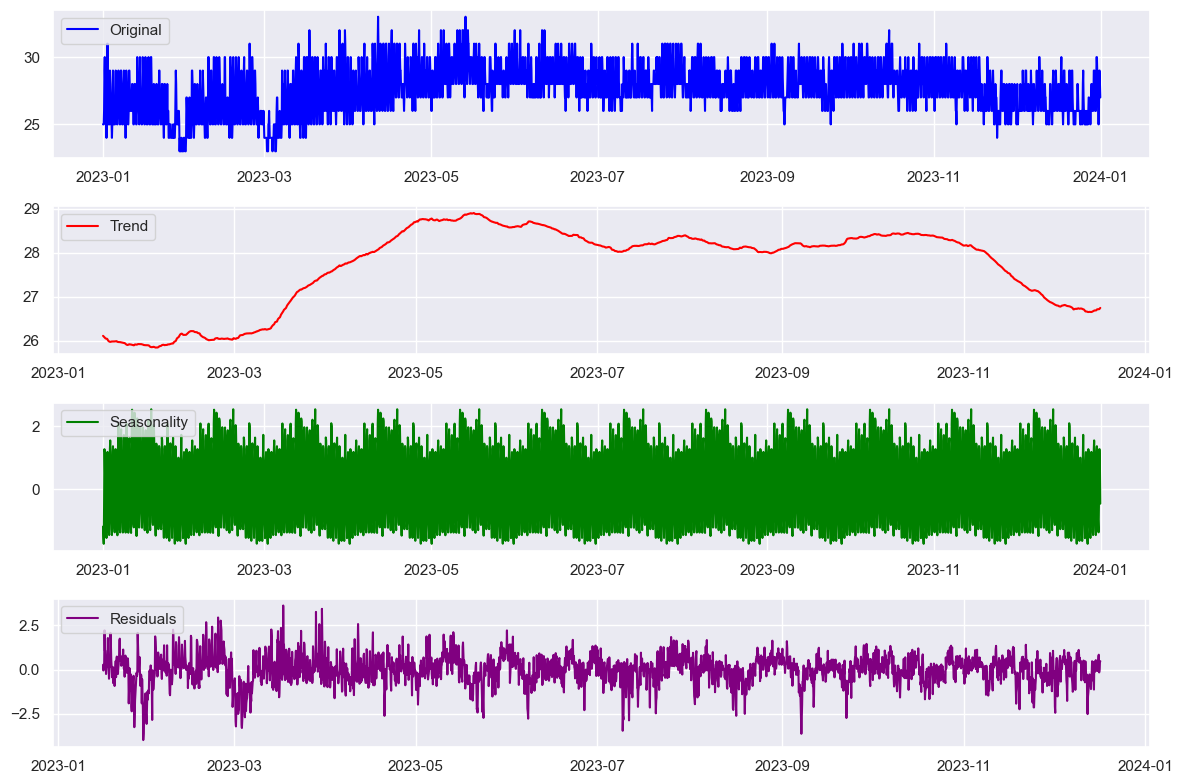

windspeed


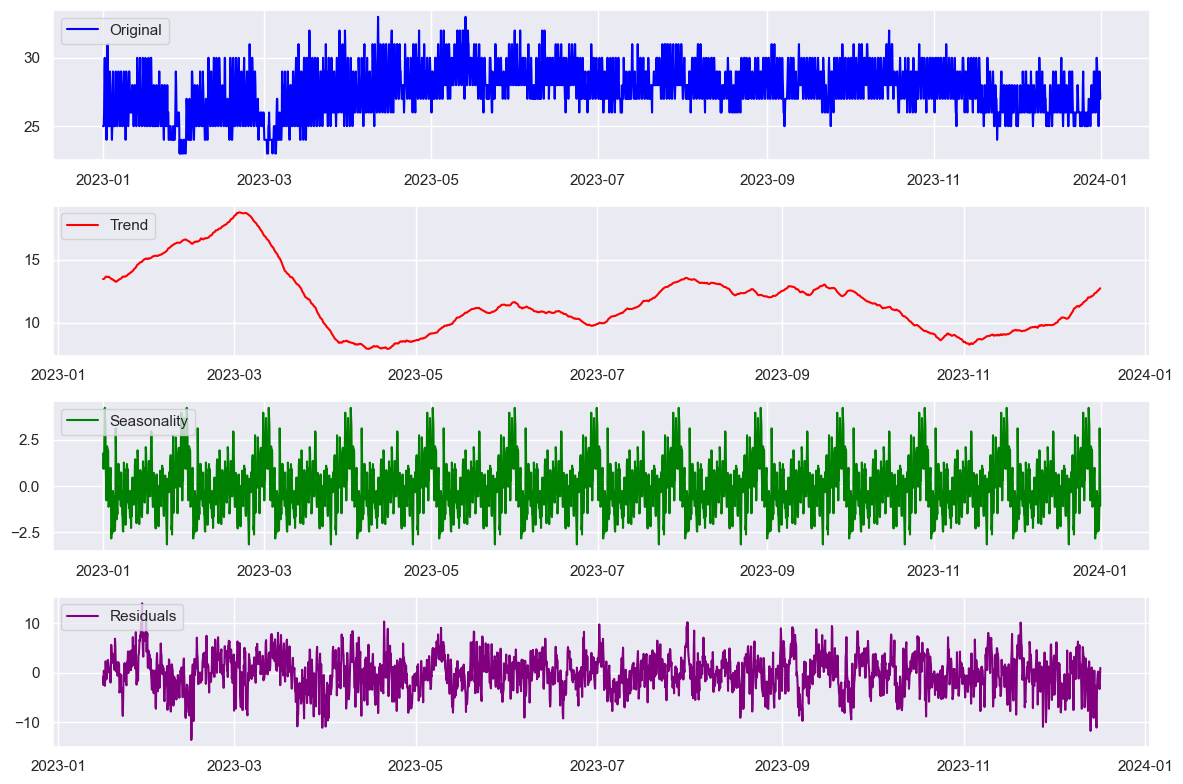

rainfall


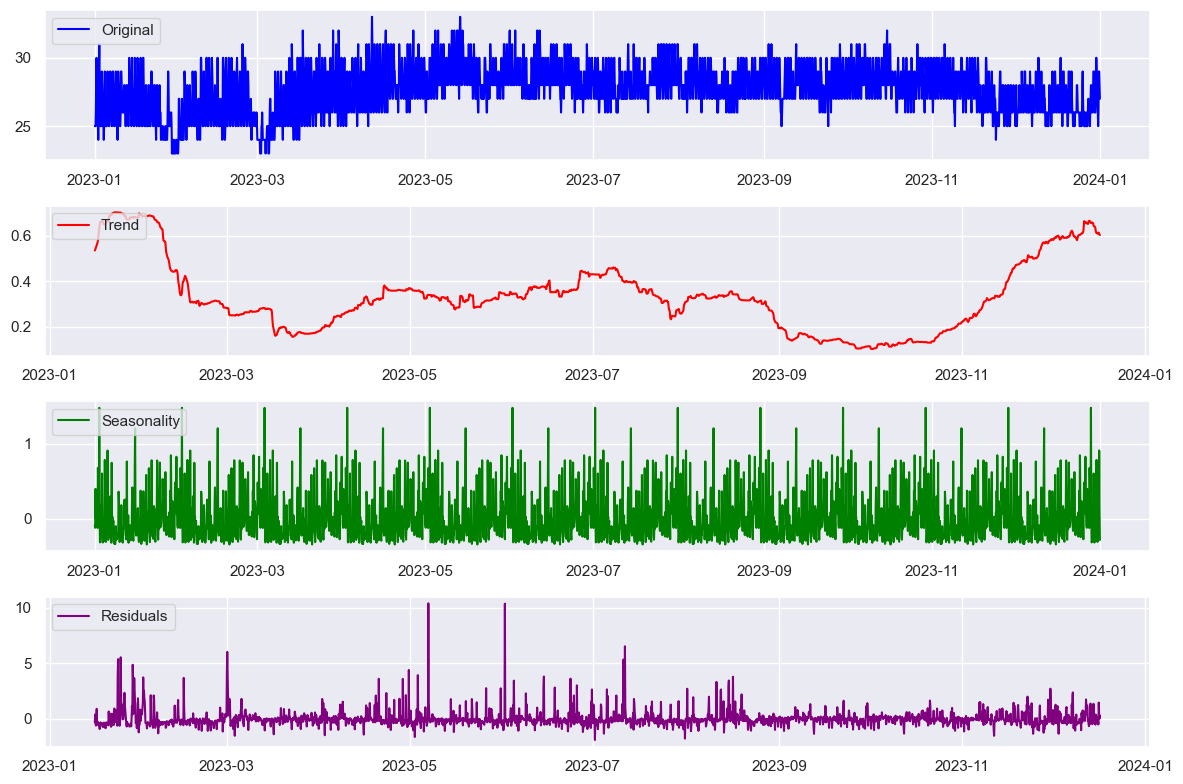

humidity


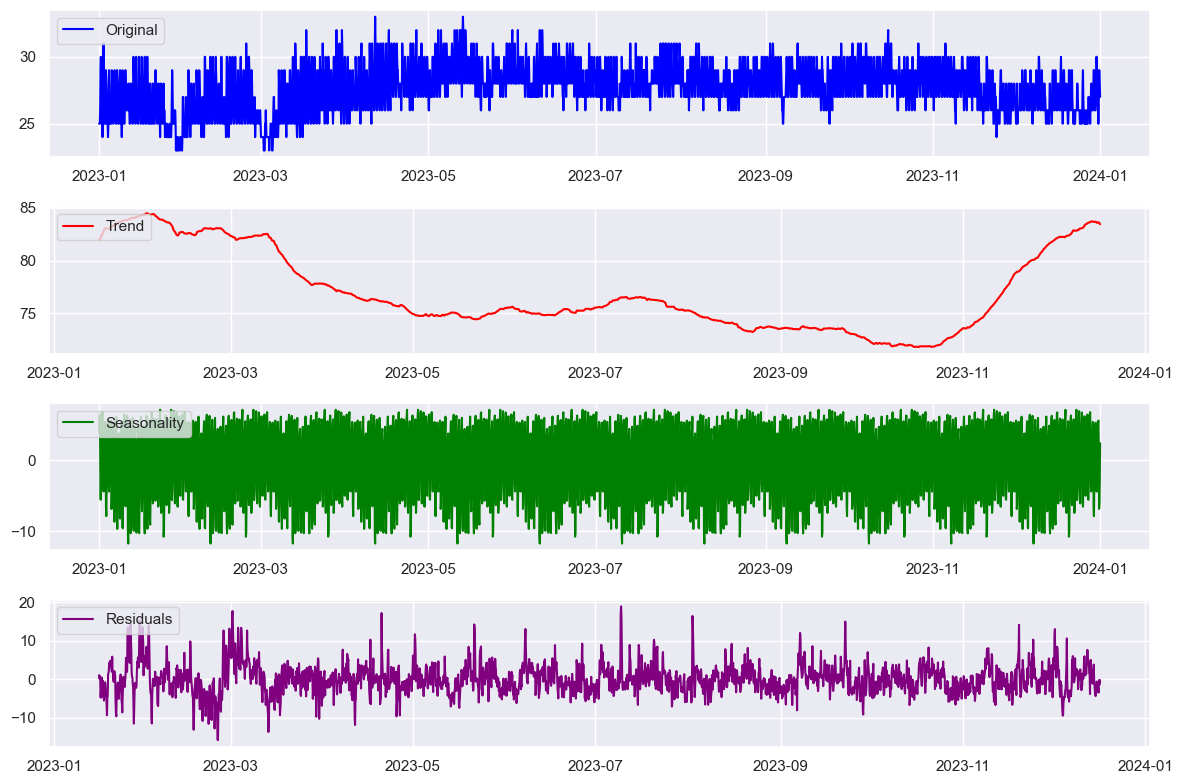

pressure


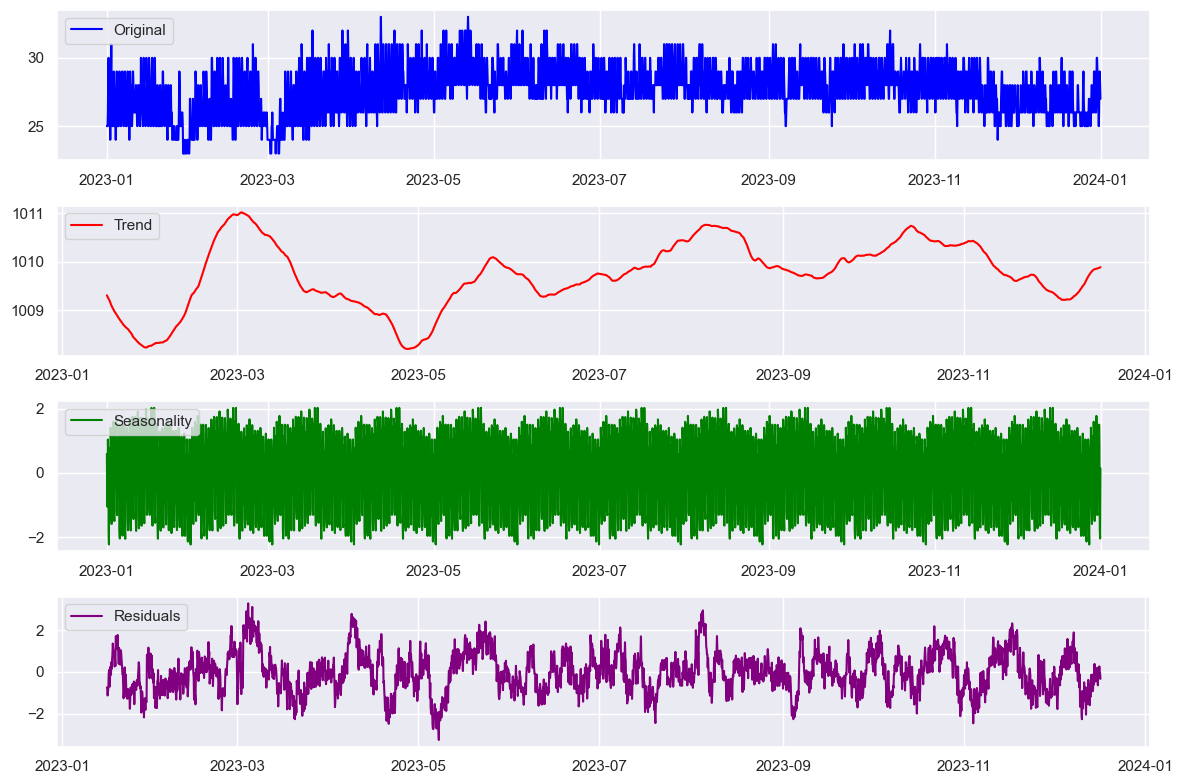

cloudcover


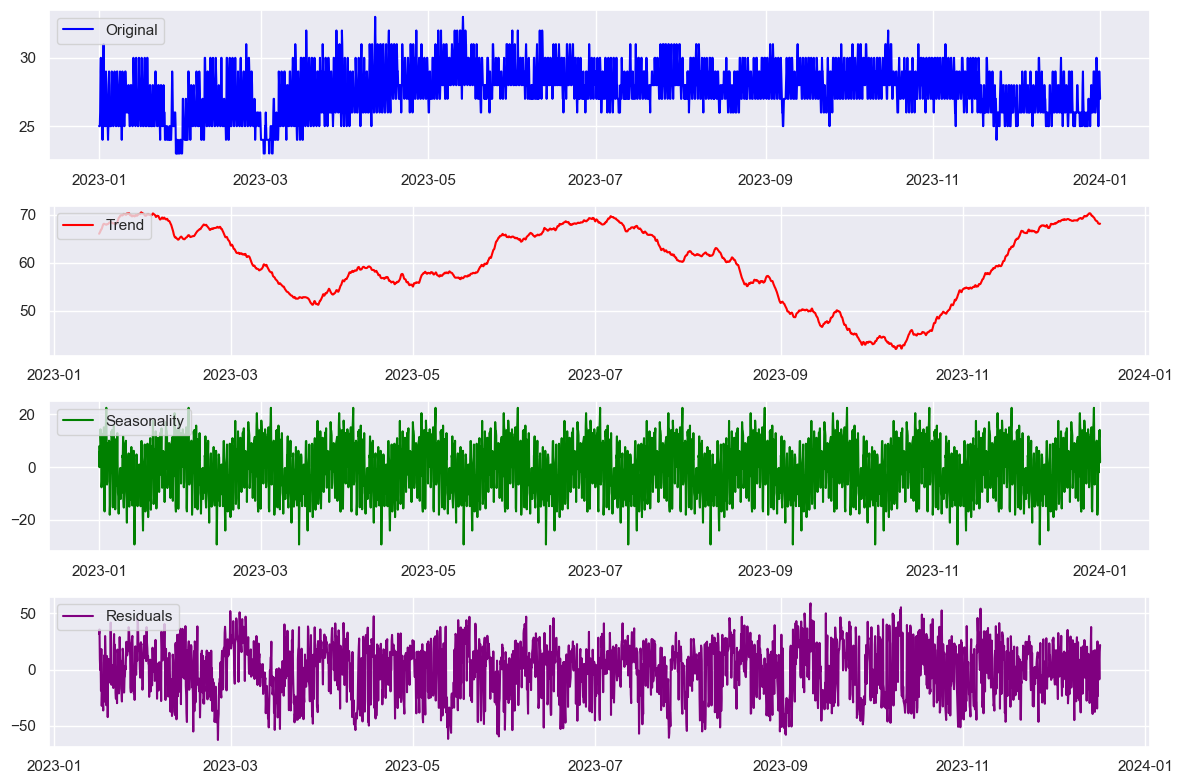

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = data.drop(columns = ['time'], axis =  1)

for x in data.select_dtypes(include = [int, float]) :
    print(x)
    decomposition = seasonal_decompose(data[x], period=240)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(data.index, data['tempC'], label='Original', color='blue')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 2)
    plt.plot(data.index, trend, label='Trend', color='red')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 3)
    plt.plot(data.index, seasonal, label='Seasonality', color='green')
    plt.legend(loc = 'upper left')

    plt.subplot(4, 1, 4)
    plt.plot(data.index, residual, label='Residuals', color='purple')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()